In [250]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns

In [251]:
pd.set_option('display.max_columns', None)

# HW:
The data set includes the churn of customers of a telecommunications company.
The task is to create segments from customers based on their characteristics using the KMeans algorithm.

Do not use the following variables for grouping:
- churn?: has the customer dropped out?
- Contract_date: contract conclusion time
- Cust_ID: customer ID

#  1. Data Preparation and Data Analysis


In [252]:
## reading the data
file_path = "telco_sampled.csv"
df = pd.read_csv(file_path, sep = ';')

In [253]:
print(df.head())
df.shape

       Contract_date Package  Gender   Age Marital_Status Living_Condition  \
0   9/20/04 12:00 AM  PACK_B    Male  42.0        Married            Owner   
1   2/12/05 12:00 AM  PACK_B  Female  53.0        Married            Owner   
2  10/19/04 12:00 AM  PACK_X    Male  43.0        Married            Owner   
3  10/31/04 12:00 AM  PACK_B    Male  32.0        Married            Owner   
4  11/19/04 12:00 AM  PACK_B  Female  31.0        Married            Owner   

   Graduation         Job_Type     Income  Peak_minute_09  Weekend_minute_09  \
0  University           Leader     15_30k            0.55               0.28   
1  University  Public_Employee  Below_15k           11.32               6.53   
2  Highschool        Executive     30_60k           78.05               3.90   
3  Highschool         Labourer     15_30k            0.08               0.00   
4  Highschool  Public_Employee     30_60k           20.68              13.87   

   Offpeak_minute_09  Offpeak_nr_09  Peak_nr_09  W

(1565, 59)

In [254]:
df['churn?'].value_counts()
print(df.columns)

Index(['Contract_date', 'Package', 'Gender', 'Age', 'Marital_Status',
       'Living_Condition', 'Graduation', 'Job_Type', 'Income',
       'Peak_minute_09', 'Weekend_minute_09', 'Offpeak_minute_09',
       'Offpeak_nr_09', 'Peak_nr_09', 'Weekend_nr_09', 'Selfnet_minute_09',
       'Fixed_minute_09', 'Othermob_minute_09', 'Voicemail_nr_09',
       'Voicemail_minute_09', 'SMS_09', 'Peak_minute_10', 'Weekend_minute_10',
       'Offpeak_minute_10', 'Offpeak_nr_10', 'Peak_nr_10', 'Weekend_nr_10',
       'Selfnet_minute_10', 'Fixed_minute_10', 'Othermob_minute_10',
       'Voicemail_nr_10', 'Voicemail_minute_10', 'SMS_10', 'Peak_minute_11',
       'Weekend_minute_11', 'Offpeak_minute_11', 'Offpeak_nr_11', 'Peak_nr_11',
       'Weekend_nr_11', 'Selfnet_minute_11', 'Fixed_minute_11',
       'Othermob_minute_11', 'Voicemail_nr_11', 'Voicemail_minute_11',
       'SMS_11', 'Peak_minute_12', 'Weekend_minute_12', 'Offpeak_minute_12',
       'Offpeak_nr_12', 'Peak_nr_12', 'Weekend_nr_12', 'Selfnet_

# 1.1 Subtask: (data preparation)
Use all variables except for the three variables above when creating the clusters. Perform data preparation so that the variables are input to the model in the appropriate form.

(hint: categorical variables, missing values, scaling, etc.)

In [255]:
print(df.dtypes)

Contract_date           object
Package                 object
Gender                  object
Age                    float64
Marital_Status          object
Living_Condition        object
Graduation              object
Job_Type                object
Income                  object
Peak_minute_09         float64
Weekend_minute_09      float64
Offpeak_minute_09      float64
Offpeak_nr_09          float64
Peak_nr_09             float64
Weekend_nr_09          float64
Selfnet_minute_09      float64
Fixed_minute_09        float64
Othermob_minute_09     float64
Voicemail_nr_09        float64
Voicemail_minute_09    float64
SMS_09                 float64
Peak_minute_10         float64
Weekend_minute_10      float64
Offpeak_minute_10      float64
Offpeak_nr_10          float64
Peak_nr_10             float64
Weekend_nr_10          float64
Selfnet_minute_10      float64
Fixed_minute_10        float64
Othermob_minute_10     float64
Voicemail_nr_10        float64
Voicemail_minute_10    float64
SMS_10  

In [256]:
## Replace missing values with meaningful substitutes namely the mean

print(df.isnull().sum())

#There is no missing values in the columns , if any
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == "float64":
            df[column].fillna(df[column].mean(),inplace=True)
        if df[column].dtype == "object":
            df[column].fillna(df[column].mode()[0],inplace=True)
            
        

Contract_date          0
Package                0
Gender                 0
Age                    0
Marital_Status         0
Living_Condition       0
Graduation             0
Job_Type               0
Income                 0
Peak_minute_09         0
Weekend_minute_09      0
Offpeak_minute_09      0
Offpeak_nr_09          0
Peak_nr_09             0
Weekend_nr_09          0
Selfnet_minute_09      0
Fixed_minute_09        0
Othermob_minute_09     0
Voicemail_nr_09        1
Voicemail_minute_09    1
SMS_09                 0
Peak_minute_10         0
Weekend_minute_10      0
Offpeak_minute_10      0
Offpeak_nr_10          0
Peak_nr_10             0
Weekend_nr_10          0
Selfnet_minute_10      0
Fixed_minute_10        0
Othermob_minute_10     0
Voicemail_nr_10        1
Voicemail_minute_10    0
SMS_10                 0
Peak_minute_11         0
Weekend_minute_11      0
Offpeak_minute_11      0
Offpeak_nr_11          0
Peak_nr_11             0
Weekend_nr_11          0
Selfnet_minute_11      0


In [257]:
## Remove the duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(1565, 59)


In [258]:
# changing columns where  from object to categorical and encoding
catergorical_col= df.select_dtypes(include=["object"]).columns
df[catergorical_col] = df[catergorical_col].astype("category")
print(df.dtypes)

Contract_date          category
Package                category
Gender                 category
Age                     float64
Marital_Status         category
Living_Condition       category
Graduation             category
Job_Type               category
Income                 category
Peak_minute_09          float64
Weekend_minute_09       float64
Offpeak_minute_09       float64
Offpeak_nr_09           float64
Peak_nr_09              float64
Weekend_nr_09           float64
Selfnet_minute_09       float64
Fixed_minute_09         float64
Othermob_minute_09      float64
Voicemail_nr_09         float64
Voicemail_minute_09     float64
SMS_09                  float64
Peak_minute_10          float64
Weekend_minute_10       float64
Offpeak_minute_10       float64
Offpeak_nr_10           float64
Peak_nr_10              float64
Weekend_nr_10           float64
Selfnet_minute_10       float64
Fixed_minute_10         float64
Othermob_minute_10      float64
Voicemail_nr_10         float64
Voicemai

In [259]:
## convert categorical to numerical by enconding:One-Hot Encoding for nominal data 

df = pd.get_dummies(df, columns=['Gender', 'Marital_Status',"Package","Living_Condition","Graduation","Job_Type","Income"], drop_first=True)
print(df.dtypes)
print(df.columns)

Contract_date               category
Age                          float64
Peak_minute_09               float64
Weekend_minute_09            float64
Offpeak_minute_09            float64
                              ...   
Job_Type_Public_Employee       uint8
Job_Type_Retired               uint8
Income_30_60k                  uint8
Income_Below_15k               uint8
Income_Over_60k                uint8
Length: 75, dtype: object
Index(['Contract_date', 'Age', 'Peak_minute_09', 'Weekend_minute_09',
       'Offpeak_minute_09', 'Offpeak_nr_09', 'Peak_nr_09', 'Weekend_nr_09',
       'Selfnet_minute_09', 'Fixed_minute_09', 'Othermob_minute_09',
       'Voicemail_nr_09', 'Voicemail_minute_09', 'SMS_09', 'Peak_minute_10',
       'Weekend_minute_10', 'Offpeak_minute_10', 'Offpeak_nr_10', 'Peak_nr_10',
       'Weekend_nr_10', 'Selfnet_minute_10', 'Fixed_minute_10',
       'Othermob_minute_10', 'Voicemail_nr_10', 'Voicemail_minute_10',
       'SMS_10', 'Peak_minute_11', 'Weekend_minute_11', 'Off

In [260]:
# Segmentation based on Weekend_minute

customer_df = df.groupby('Age')['Weekend_minute_09'].agg(['count', 'mean'])

In [261]:
customer_df.head()

,count,mean
Age,,
16.0,3,0.613333
17.0,8,4.927500
18.0,14,5.620000
19.0,18,13.019444
20.0,42,17.857381


In [262]:
X_cols = ['mean', 'count']
X = customer_df.loc[:, X_cols]

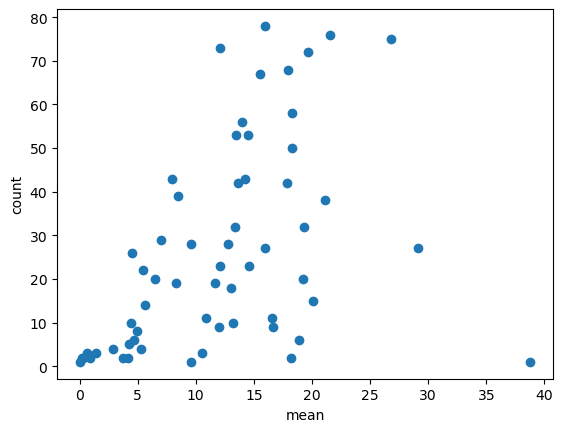

In [263]:
plt.scatter(customer_df['mean'], customer_df['count'])
plt.xlabel("mean")
plt.ylabel("count")
plt.show()

In [264]:
#Scaling the data
scaler = StandardScaler()

scale_df =scaler.fit_transform(X)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


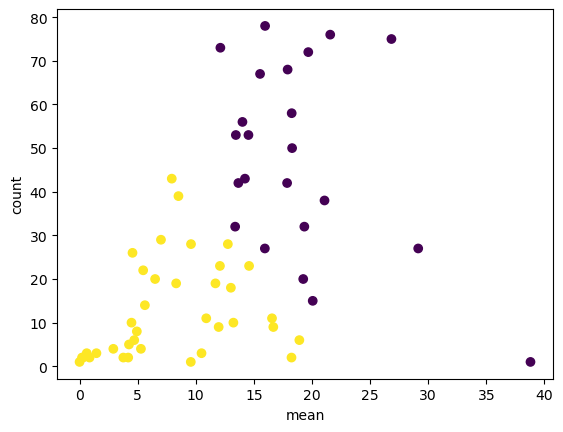

In [265]:
# For now, we assume that we have two clusters (we set K to 2)
kmeans = KMeans(n_clusters=2, random_state = 42)

# We fit the model to the data that we have
kmeans.fit(scale_df)
# The model assigns the predicted label (cluster) for each instance
# Each instance gets a label out of two possible labels, why?
customer_df['cluster'] = kmeans.predict(scale_df)

# To visualize the clusters, we simply plot all the instances by two different colors; e.g. the 1st cluster is plot in yellow, while the 2nd is plot in purple
plt.scatter(customer_df['mean'], customer_df['count'], c=customer_df['cluster'])
plt.xlabel("mean")
plt.ylabel("count")
plt.show()

# 2. Subtask: (clustering)
Find the optimal k value for the KMeans algorithm using the variables prepared in the previous task. Then group the customers.

In [266]:
# 
SSE = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scale_df)
    SSE.append(kmeans.inertia_)

print(SSE)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

[120.00000000000001, 59.01060592726066, 37.05314915775965, 25.7608437431361, 19.345206787209232, 14.864763145334031, 12.351096957241486, 10.924796609075996, 9.014851845257908, 7.454706436390896]


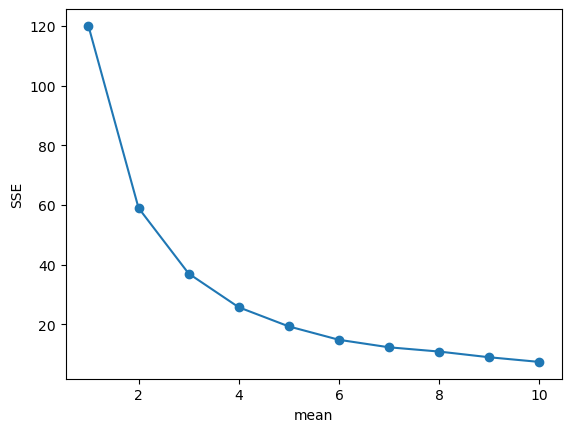

In [267]:
# Ploting values based on k numbers

plt.plot(range(1,11),SSE,marker="o")
plt.xlabel("mean")
plt.ylabel("SSE")
plt.show()

In [268]:
# We pick the elbow point (K=3) because the if we increase K , SSE does not considerably decraese , that is why the best choice is K=3 and lower classes as well

optimal_k = 3  # Replace with your optimal k from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scale_df)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


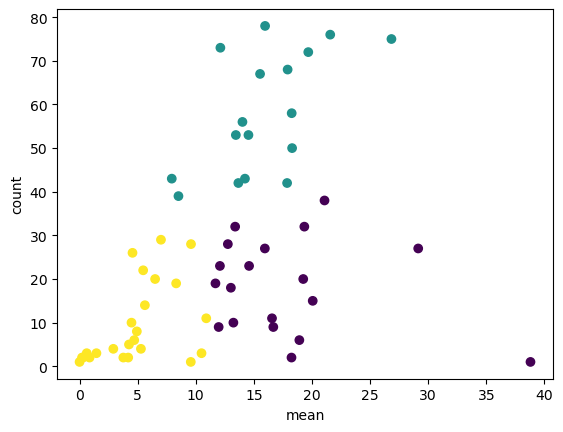

In [269]:
plt.scatter(customer_df['mean'], customer_df['count'], c=customer_df['Cluster'])
plt.xlabel("mean")
plt.ylabel("count")
plt.show()

In [270]:
# finding the centroids in the final drawings
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

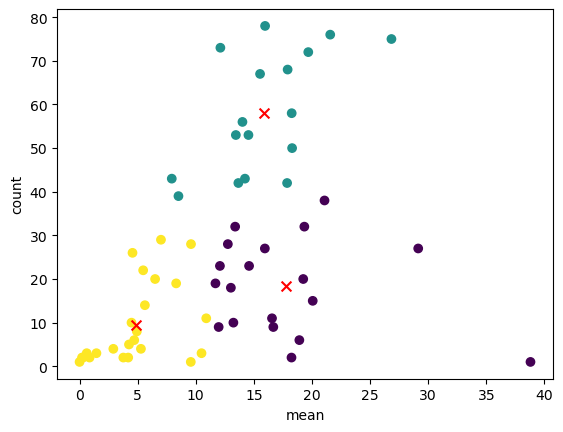

In [271]:
plt.scatter(customer_df['mean'], customer_df['count'], c=customer_df['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], color='r', s=50, marker = 'x')
plt.xlabel("mean")
plt.ylabel("count")
plt.show()

# 3. Subtask: (explaination of clusters / conclusions)
Try to find an explanation of what characterizes each group and what characteristics caused each customer to be in the given cluster.

### In this step, we are finalizing the clustering task by implementing the KMeans algorithm with the optimal number of clusters (K=3), which was selected using the elbow method. This choice was made because increasing the number of clusters beyond 3 didn't result in a significant decrease in the sum of squared errors (SSE), meaning that 3 clusters provide a good balance between model complexity and fit quality